**Author - Chavan Pooja**

# **Data Science Internship Task 2**

# **Prediction using Decision Tree Algorithm**

In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#To Print Number of Rows and Columns
df.shape

(150, 6)

In [6]:
#To Check whether there is Null Values in Every Column
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Check for Duplicate

df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [8]:
#To Print Number of Rows and Columns
df.shape

(150, 6)

In [9]:
# Statistical Measure of data.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
# Get the Correlation of the Column
df.iloc[:,1:5].corr() #index1 to index 4 (0-1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


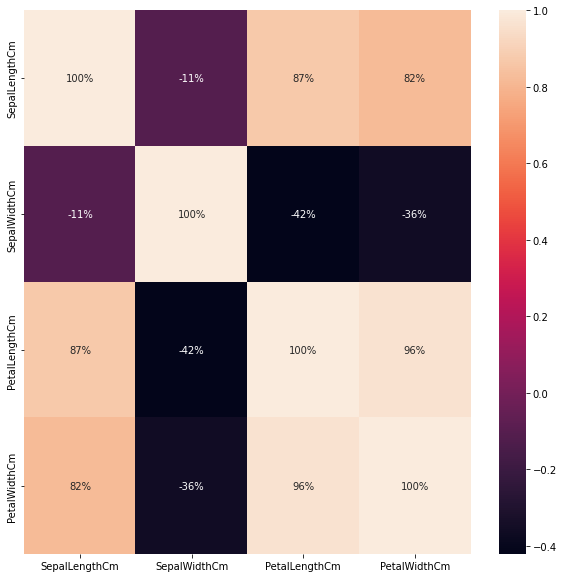

In [11]:
# Visualize the Correlation
# To Increase the Size of Heatmap Layout
plt.figure(figsize=[10,10])
sns.heatmap(df.iloc[:,1:5].corr(), annot=True,fmt='.0%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


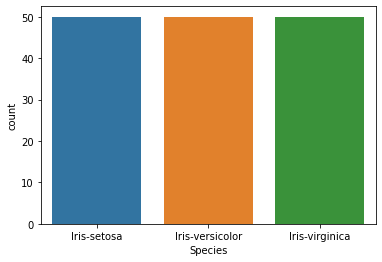

In [12]:
#Visualize the Count
sns.countplot(df['Species'],label="No_of_Count")

<Figure size 576x360 with 0 Axes>

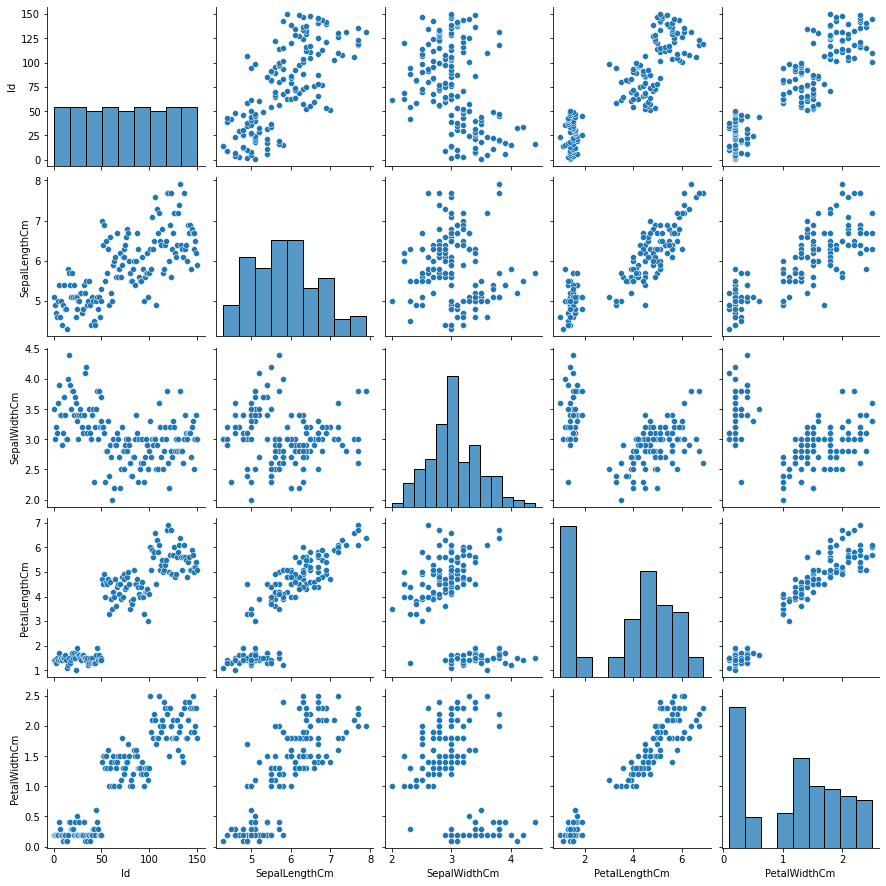

In [14]:
#Multi Variate Analysis
plt.figure(figsize=(8,5))
sns.pairplot(df)

In [15]:
#Encode the Categorical Data Value

from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
s=labelencoder_Y.fit_transform(df.iloc[:,5].values) 

#to Make Changes to the Database Using Encoded Value
df.iloc[:,5]=s

In [16]:
df.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [21]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size =0.30, random_state=0)

In [23]:
# Scale the Data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
i= StandardScaler()
X_train =i.fit_transform(X_train)
X_test=i.fit_transform(X_test)

In [24]:
#Create a Function 
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
b= DecisionTreeClassifier(criterion= "entropy", random_state=0)
b.fit(X_train, Y_train)

#Print Model Accuracy on Training Data
print('[0] Decision Tree Classifier Training Accuracy:',b.score(X_train,Y_train))

[0] Decision Tree Classifier Training Accuracy: 1.0


In [25]:
#Getting All the Models
y_pred=b.predict(X_test)

In [26]:
#Checking Accuracy of Model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9111111111111111

In [27]:
# Confusion Matrix(Easiest Way)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[16,  0,  0],
       [ 0, 14,  4],
       [ 0,  0, 11]])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



[Text(0.6, 0.8333333333333334, 'X[0] <= 0.518\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.4, 0.5, 'X[4] <= -0.613\nentropy = 0.999\nsamples = 66\nvalue = [34, 32, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

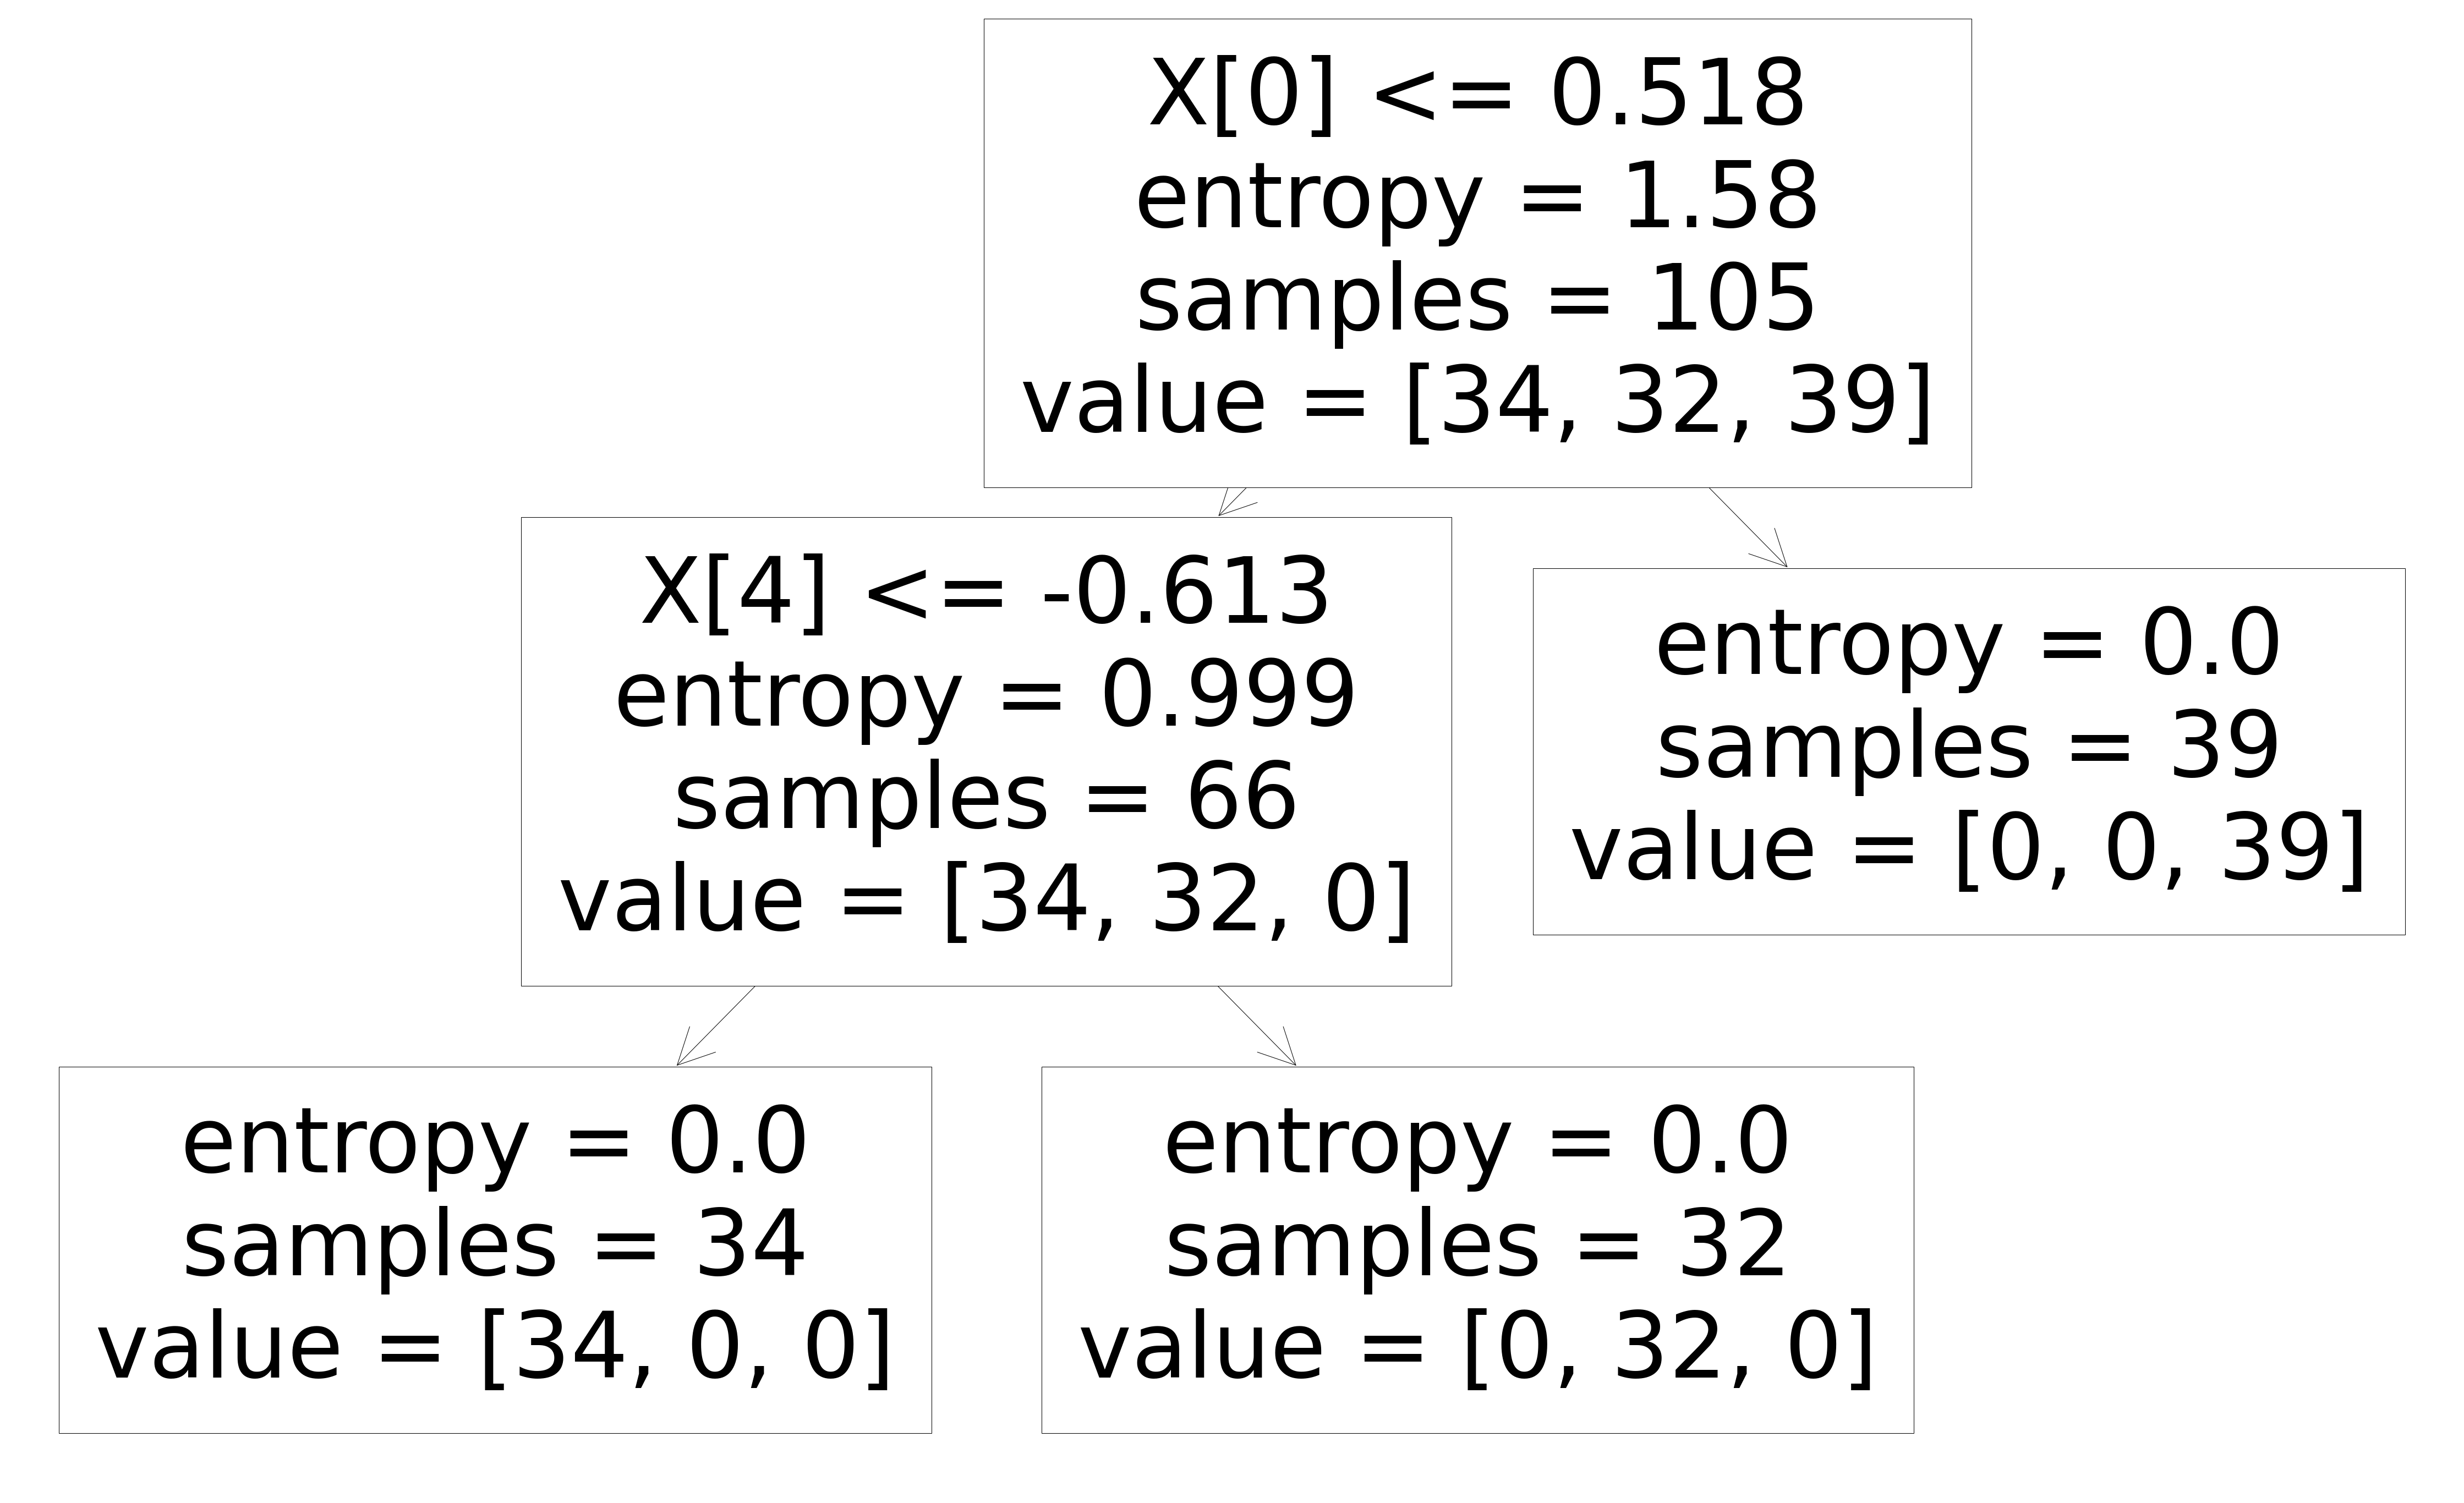

In [29]:
#Visualizing Decision Tree
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(b)

# **Thank You !!!!**  